# Caso de estudio: diferencias en los pagos según género dentro de una compañía

In [ ]:
!pip install pingouin
!pip install bqplot
!pip install chart_studio

In [ ]:
import os
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)
%cd "/content/gdrive/MyDrive/DataScience/Practicas"

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

Mounted at /content/gdrive
/content/gdrive/MyDrive/DataScience/Practicas


### Exploración de la data

In [ ]:
df = pd.read_csv("glassdoordata.csv")

In [ ]:
df.head()

,jobtitle,gender,age,performance,education,department,seniority,income,bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [ ]:
df.shape #dimensión

(1000, 9)

Documentación:

*  **jobtitle**: título del trabajo
*  **gender**: género
*  **age**: edad
*  **performance**: rendimiento en una escala de 1 a 5, siendo 1 el más bajo y 5 el más alto
*  **education**: nivel educativo
*  **department**: departamento de trabajo
*  **seniority**: en una escala de 1 a 5, siendo 1 el más bajo y 5 el más alto
*  **income**: salario anual (USD)
*  **bonus**: bonus de pago anual (USD)


Queremos ver si existen diferencias en la compensación total que reciben los hombres y las mujeres. Por lo que se requiere la creación de una nueva columna que contemple tanto el salario como los bonus de pago.

In [ ]:
df['pay'] = df['income']+df['bonus']
df.head()

,jobtitle,gender,age,performance,education,department,seniority,income,bonus,pay
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783


### EDA

In [ ]:
df.corr(method='pearson')

,age,performance,seniority,income,bonus,pay
age,1.000000,-0.056875,-0.021414,0.562681,-0.414337,0.533715
performance,-0.056875,1.000000,-0.021127,-0.053622,0.855500,0.014155
seniority,-0.021414,-0.021127,1.000000,0.511096,0.194982,0.530307
income,0.562681,-0.053622,0.511096,1.000000,-0.129481,0.996874
bonus,-0.414337,0.855500,0.194982,-0.129481,1.000000,-0.050736
pay,0.533715,0.014155,0.530307,0.996874,-0.050736,1.000000


Descartando las variables de salario y bonus, que son las que se utilizaron para construir la columna de pagos, se observa que las variables que mejor correlacionan con el pago son la edad y el seniority.

#### Pago vs edad

<AxesSubplot:xlabel='age', ylabel='pay'>

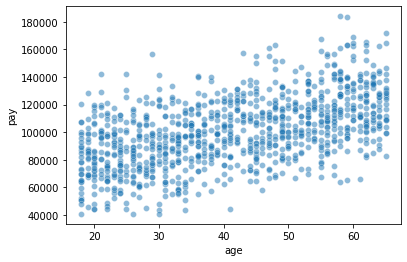

In [ ]:
sns.scatterplot(data = df, x = "age", y = "pay", alpha = .5)

Se observa lo que pareciera ser una relación lineal creciente entre la edad de la persona y el pago que recibe.

#### Pago vs seniority

Text(0.5, 1.0, 'Seniority vs Pay')

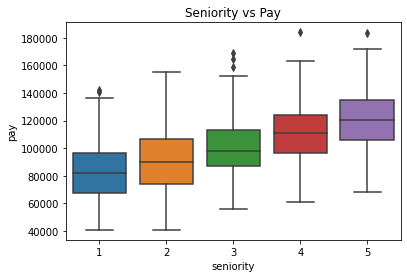

In [ ]:
sns.boxplot(data = df, x = "seniority", y = "pay")
plt.title("Seniority vs Pay")

Se observa que a medida que aumenta el nivel de seniority las medianas de los pagos también aumentan. Si bien cada caja pareciera estar bastante solapada con la caja del nivel siguiente (por lo que no podríamos afirmar que existan diferencias significativas a priori), sí se observa que para el caso del nivel 1 podrían existir diferencias significativas en los pagos en relación a las personas con un seniority de nivel 4 o 5. Lo mismo ocurre con las personas con un seniority de 2 en relación a las que tienen un seniority de 5. 

La variabilidad de observa similar. Y, a excepción del nivel 2, todos los casos presentan outliers.

### Pago vs nivel educativo

Text(0.5, 1.0, 'Education vs Pay')

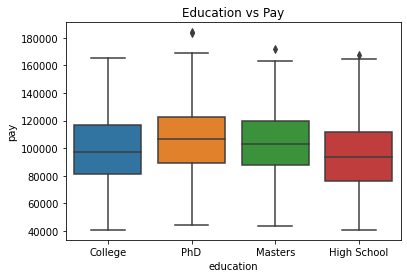

In [ ]:
sns.boxplot(data = df, x = "education", y = "pay")
plt.title("Education vs Pay")

Se observa que las medianas de las personas con PhD y Másters son ligeramente superiores que las de High School y College, siendo la de PhD la más alta de las cuatro. Sin embargo, las cajas se encuentran muy solapadas, por lo que no parecieran existir diferencias significativas. 

La variabilidad también es similar en todos los casos.

#### Pago vs género

In [ ]:
df.groupby("gender")["pay"].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,468.0,96416.831197,24202.157488,40828.0,80866.50,96571.0,112660.5,168968.0
Male,532.0,104918.678571,25329.566633,41030.0,87791.75,105100.5,121617.0,184010.0


Text(0.5, 1.0, 'Pay vs Gender')

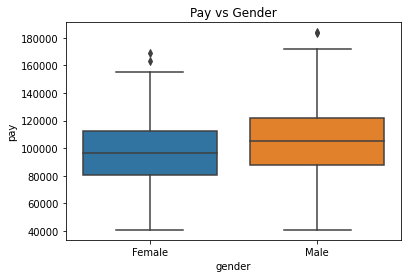

In [ ]:
sns.boxplot(data = df, x = "gender", y = "pay")
plt.title("Pay vs Gender")

Se observa que la mediana para el caso de los pagos recibidos por los hombres es ligeramente superior a la mediada de los pagos recibidos por mujeres, no obstante, las cajas se encuentran bastante solapadas por lo que a priori no parecieran existir diferencias significativas. 

La variabilidad también es levemente mayor para el caso de los pagos recibidos por hombres. Ambos casos presentan outliers.

Text(0.5, 1.0, 'Seniority pay vs Gender')

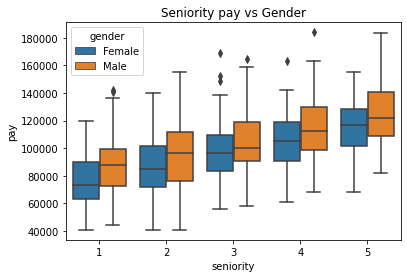

In [ ]:
sns.boxplot(data = df, x = "seniority", y = "pay", hue = "gender")
plt.title("Seniority pay vs Gender")

Al discriminar los salarios por el seniority nos encontramos con que, para todos los casos, la mediana del pago que reciben los hombres es ligeramente superior que la mediana del pago que reciben las mujeres, si bien las cajas siguen encontrándose solapadas por lo que a priori no podríamos afirmar que existan diferencias significativas.

Text(0.5, 1.0, 'Job title pay vs Gender')

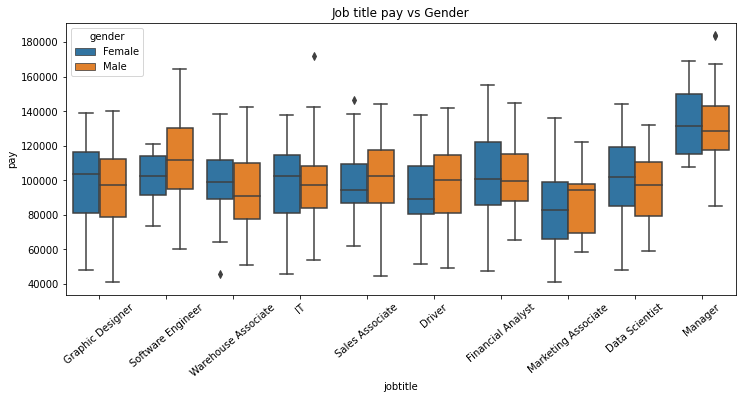

In [ ]:
fig,ax = plt.subplots()
fig.set_size_inches(12, 5)
ax.tick_params(axis='x', rotation=40)
sns.boxplot(data = df, x = "jobtitle", y = "pay", hue = "gender")
plt.title("Job title pay vs Gender")

Al discriminar los salarios por puesto de trabajo nos encontramos con que hay casos en los cuales la mediana es ligeramente superior en los pagos de las muejeres. Esto es para los puestos de Graphic Design, Warehouse Associate, IT, 
Financial Analyst, Data Scientist y Manager. Sin embargo en todos ellos hay solapamiento de cajas, por lo que no podríamos afirmar a priori que existan diferencias significativas. 

Destaca el caso los Software Engineers en el cual la variabilidad de los pagos de las mujeres es bastante menor a la variabilidad de pagos de los hombres.

Text(0.5, 1.0, 'Performance pay vs Gender')

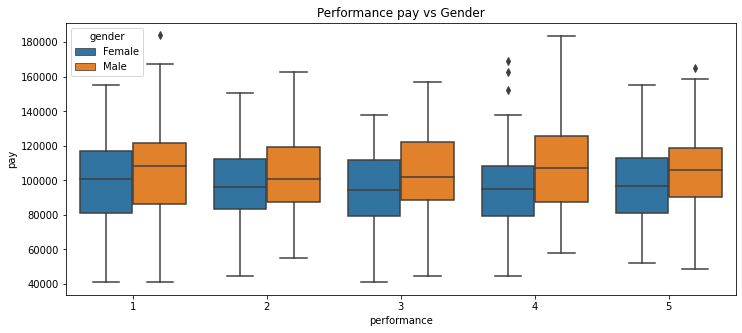

In [ ]:
fig,ax = plt.subplots()
fig.set_size_inches(12, 5)
sns.boxplot(data = df, x = "performance", y = "pay", hue = "gender")
plt.title("Performance pay vs Gender")

Una de las medidas más importantes en una empresa es el rendimiento de los empleados (performance en nuestro caso de estudio). En este gráfico observamos que para todos los niveles de performance la mediana del pago que reciben los hombres es ligeramente superior que la mediana del pago que reciben las mujeres. 

En el caso de las personas que recibieron una calificación de 4 en su performance observamos que la mediana de pago de los hombres es casi igual al pago que recibe el 75% de las muejeres con igual calificación. 

Nuevamente las cajas se encuentran bastante solapadas por lo que a priori no podríamos afirmar que existan diferencias significativas en los pagos.

### Modelos lineales

#### Modelo tomando en cuenta la edad

In [ ]:
model_1 = "pay~age"
lm_1 = sm.ols(formula = model_1, data = df).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     397.5
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           1.04e-74
Time:                        00:01:21   Log-Likelihood:                -11384.
No. Observations:                1000   AIC:                         2.277e+04
Df Residuals:                     998   BIC:                         2.278e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.206e+04   2062.885     30.085      0.0

El IC del 95% de confianza para nuestra variable predictora (edad) no contiene al 0, lo que evidencia que existe una relación lineal entre las variables, aunque no muy marcada. $R^2 = 0.284$

La interpretración correcta del modelo nos dice que por cada año que aumenta una persona gana en promedio 939 USD más (anualmente).

#### Modelo tomando en cuenta la edad y el género

In [ ]:
model_2 = "pay~age+gender"
lm_2 = sm.ols(formula = model_2, data = df).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     233.2
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           8.10e-84
Time:                        00:01:21   Log-Likelihood:                -11359.
No. Observations:                1000   AIC:                         2.272e+04
Df Residuals:                     997   BIC:                         2.274e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.674e+04   2151.480     26.

Se observa nuevamente que los intervalos de confianza del 95% no contienen el 0, por lo que existe una relación lineal entre las variables que, aunque no es muy marcada, la explica mejor que el modelo anterior. $R^2 = 0.317$

La interpretación correcta del modelo nos muestra que, nuevamente, cuando aumenta la edad un año, el salario anual aumenta en 948 USD.

Respecto al género, se toma como categoría predeterminada el género femenino y se observa que al pasar del mismo al género masculino, el salario anual aumenta en 9279 USD.

#### Modelo tomando en cuenta todas las variables

In [ ]:
model_3 = "pay~age+gender+jobtitle+education+performance+seniority+department"
lm_3 = sm.ols(formula = model_3, data = df).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     259.6
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:01:22   Log-Likelihood:                -10631.
No. Observations:                1000   AIC:                         2.130e+04
Df Residuals:                     979   BIC:                         2.141e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

Al incorporar todas las variables al modelo la brecha salarial se reduce, lo que indica que la misma se explica principalmente por otros factores como el nivel educativo, la performance, el seniority, el puesto y el departamento de trabajo. Ahora $R^2 = 0.841$, lo que indica que gran parte de la variabilidad está adecudamente explicada por el modelo.

La diferencia en los pagos anuales para los hombres y para las mujeres se redujo a 392 USD en favor del hombre. Sin embargo, el p-valor = 0.584 nos indica que esto es estadísticamente indistinguible del 0, por lo que no podemos afirmar que existan diferencias significativas entre el pago que reciben los hombres y el pago que reciben las mujeres luego de controlar todos los demás factores.